In [238]:
import pandas as pd

In [239]:
# Readind the csv dataset
full_data = pd.read_csv('data/diabetic_data.csv')

In [395]:
# Getting the first encounter (by min encounter_id per patient)
first_encounter_per_patient = full_data.groupby('patient_nbr').encounter_id.agg('min')
first_encounter = full_data.loc[full_data.encounter_id.isin(first_encounter_per_patient)]
first_encounter

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [303]:
# Auxiliary function to create a dataframe with the icd9 codes as id's of Group Name os the diagnostics
def create_diag_name_dataframe(diagnostic_name, lower_bound, upper_bound):
    df = pd.concat([pd.DataFrame([diagnostic_name], index=[id], columns=['Group name']) 
                    for id in range(lower_bound,upper_bound+1)])
    return df

In [512]:
# Creates a unique dataframe with all diagnosis group names according to the Table 2 of the paper

# Circulatory group
circulatory = create_diag_name_dataframe('Circulatory',390,459)
circulatory = pd.concat([circulatory,create_diag_name_dataframe('Circulatory',785,785)])
# Respiratory group
respiratory = create_diag_name_dataframe('Respiratory',460,519)
respiratory = pd.concat([respiratory,create_diag_name_dataframe('Respiratory',786,786)])
# Digestive group
digestive = create_diag_name_dataframe('Digestive',520,579)
digestive = pd.concat([digestive,create_diag_name_dataframe('Digestive',787,787)])
# Diabetes group
diabetes = create_diag_name_dataframe('Diabetes',250,250)
# Injury group
injury = create_diag_name_dataframe('Injury',800,999)
# Musculoskeletal group
musculoskeletal = create_diag_name_dataframe('Musculoskeletal',710,739)
# Genitourinary group
genitourinary = create_diag_name_dataframe('Genitourinary',580,629)
genitourinary = pd.concat([genitourinary,create_diag_name_dataframe('Genitourinary',788,788)])
# Neoplasms group
neoplasms = create_diag_name_dataframe('Neoplasms',140,239)
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',780,781)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',784,784)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',790,799)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',240,249)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',251,279)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',680,709)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',782,782)])
neoplasms = pd.concat([neoplasms,create_diag_name_dataframe('Neoplasms',1,139)])
# Other group
other = pd.DataFrame('Other', index=[0], columns=['Group name'])

diagnosis_names = pd.concat([circulatory,respiratory,digestive,
                             diabetes,injury,musculoskeletal,
                             genitourinary,neoplasms,other])

In [498]:
# Converts diagnostic codes' columns into number to join further
df = pd.DataFrame(index=first_encounter.encounter_id)
diag_columns = ['diag_1', 'diag_2', 'diag_3']

for col in diag_columns:
    num_codes = []
    for v in first_encounter[col]:
        try:
            val = v.split('.')
            num_codes.append(int(val[0]))
        except:
            num_codes.append(int(0))
    df[col] = num_codes

In [499]:
# Joins the original dataset with converted diagnostic codes' columns 
left = first_encounter.set_index(['encounter_id'])
right = df

join_df = left.join(right, lsuffix='_orig', rsuffix='_num')
join_df.index

Int64Index([  2278392,    149190,     64410,    500364,     16680,     35754,
                55842,     63768,     12522,     15738,
            ...
            443811536, 443816024, 443835140, 443835512, 443841992, 443842016,
            443842022, 443842070, 443842340, 443867222],
           dtype='int64', name='encounter_id', length=71518)

In [500]:
diag_columns

['diag_1', 'diag_2', 'diag_3']

In [518]:
aux_df = join_df

for col in diag_columns:
    key_col = col + '_num'
    name_col = 'Group_' + col
    left = aux_df.set_index(key_col)
    print(diagnosis_names.columns)
    right = diagnosis_names
    right.rename(columns={'Group name': name_col})
    print(right.columns)
    aux_df = left.join(right, rsuffix=col)
    print(aux_df.loc[:-1].columns)
    
join_diag = aux_df.set_index(join_df.index)
join_diag

Index(['Group name'], dtype='object')
Index(['Group name'], dtype='object')
Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1_orig', 'diag_2_orig',
       'diag_3_orig', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_2_nu

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Group name,Group namediag_2,Group namediag_3
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,105325407,Caucasian,Male,[80-90),?,3,6,4,2,?,...,No,No,No,No,No,Yes,>30,Other,Other,Other
149190,39728214,?,Female,[70-80),?,2,1,1,7,?,...,No,No,No,No,No,No,>30,Other,Other,Other
64410,73761084,Caucasian,Female,[80-90),?,3,6,4,3,?,...,No,No,No,No,Ch,Yes,>30,Other,Other,Other
500364,86468616,Caucasian,Female,[70-80),?,3,1,1,10,?,...,No,No,No,No,No,Yes,>30,Other,Other,Other
16680,55461366,AfricanAmerican,Female,[70-80),?,2,1,1,7,?,...,No,No,No,No,Ch,Yes,NO,Other,Other,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443842016,122136422,Caucasian,Male,[50-60),?,2,3,1,7,MC,...,No,No,No,No,Ch,Yes,NO,Diabetes,Musculoskeletal,Injury
443842022,74125260,?,Male,[60-70),?,2,1,4,2,?,...,No,No,No,No,Ch,Yes,NO,Circulatory,Injury,Injury
443842070,19844505,Caucasian,Female,[50-60),?,3,6,1,8,PO,...,No,No,No,No,No,No,NO,Neoplasms,Injury,Injury


In [250]:
# Circulatory Group
edited_df = first_encounter['diag_1_name'] = first_encounter['diag_1']
edited_df

414    5233
428    3980
786    3040
410    2902
486    2439
       ... 
842       1
V60       1
52        1
366       1
982       1
Name: diag_1, Length: 697, dtype: int64

In [241]:
indexed_data = first_encounter.set_index('encounter_id')

In [242]:
indexed_data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


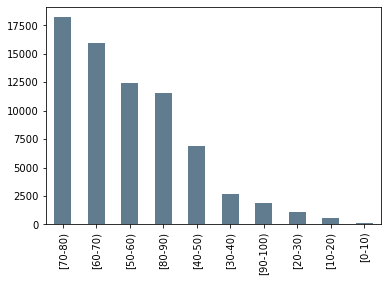

In [243]:
indexed_data.age.value_counts().plot(kind='bar',grid=False, color='#607c8e')

In [244]:
# Defines a function to check for skewed data given a percentual
def skewed_columns(df, percentual):
    cols_with_skewed_data = []
    
    for col in df.columns:
        value_count = df[col].value_counts() / df[col].count()
        if value_count.max() >= percentual:
            cols_with_skewed_data.append(col)
            
    return cols_with_skewed_data

In [245]:
skewed_columns(indexed_data, 0.5)

['race',
 'gender',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [246]:
# Defines a function that return columns having a given char and the % the char appears on the data
def columns_have_char(df, char):
    columns_with_char = {}
    
    for col in df.columns:
        string_col = df[col].astype(str)
        number_of_observations = sum(string_col == char)
        
        if number_of_observations > 0:
            columns_with_char[col] = "{:.2%}".format(number_of_observations / df[col].count())
        
    return columns_with_char

In [247]:
list_col = columns_have_char(indexed_data,'?')
list_col

{'race': '2.72%',
 'weight': '96.01%',
 'payer_code': '43.41%',
 'medical_specialty': '48.21%',
 'diag_1': '0.02%',
 'diag_2': '0.41%',
 'diag_3': '1.71%'}

In [248]:
list_col.values()

dict_values(['2.72%', '96.01%', '43.41%', '48.21%', '0.02%', '0.41%', '1.71%'])

In [249]:
full_data.columns.sort_values(ascending=True)

Index(['A1Cresult', 'acarbose', 'acetohexamide', 'admission_source_id',
       'admission_type_id', 'age', 'change', 'chlorpropamide', 'citoglipton',
       'diabetesMed', 'diag_1', 'diag_2', 'diag_3', 'discharge_disposition_id',
       'encounter_id', 'examide', 'gender', 'glimepiride',
       'glimepiride-pioglitazone', 'glipizide', 'glipizide-metformin',
       'glyburide', 'glyburide-metformin', 'insulin', 'max_glu_serum',
       'medical_specialty', 'metformin', 'metformin-pioglitazone',
       'metformin-rosiglitazone', 'miglitol', 'nateglinide',
       'num_lab_procedures', 'num_medications', 'num_procedures',
       'number_diagnoses', 'number_emergency', 'number_inpatient',
       'number_outpatient', 'patient_nbr', 'payer_code', 'pioglitazone',
       'race', 'readmitted', 'repaglinide', 'rosiglitazone',
       'time_in_hospital', 'tolazamide', 'tolbutamide', 'troglitazone',
       'weight'],
      dtype='object')